# Titanic Logistic Regression Model

## Problem Statement

This is a popular kaggle competition. In this notebook I will use machine learning to predict the passenger that survived the titanic shipwreck. I'll be applying the Logistic Regression model.

The challenge statement below is by kaggle:

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Loading the data

In [23]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# reading the csv file using pandas
df = pd.read_csv('titanic2.csv')

## Description of Titanic data

Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

## Knowing your data

In [25]:
# the first 3 rows
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [26]:
# the last three rows
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# No of rows and columns
df.shape

(891, 12)

In [29]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Exploration

### The Survived Feature

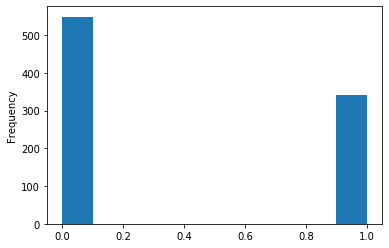

In [30]:
# distribution of the survived feature
df['Survived'].plot.hist()

The survived feature is a categorical variable.

0    549
1    342
Name: Survived, dtype: int64


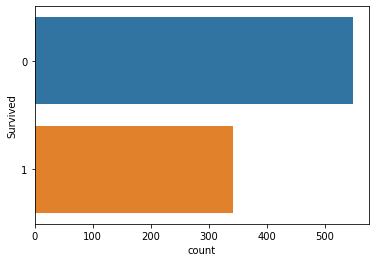

In [31]:
# using countplot to see the number of those survived and did not.
sns.countplot(y='Survived', data=df)
print(df.Survived.value_counts())

### The Pclass Feature

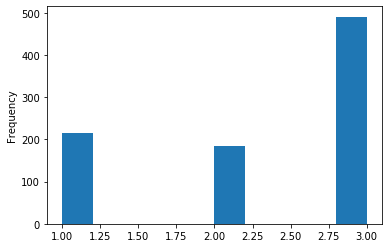

In [32]:
# distribution feature
df['Pclass'].plot.hist()

### The fare Feature

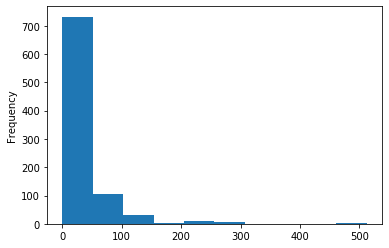

In [33]:
# distribution of fare
df['Fare'].plot.hist()

### The Age Feature

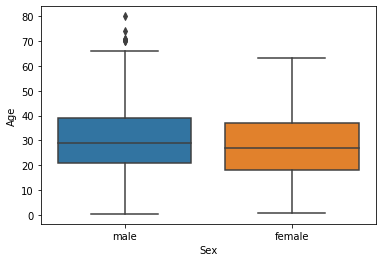

In [34]:
# comparing the Age distribution using Sex
sns.boxplot(x='Sex', y='Age', data=df)

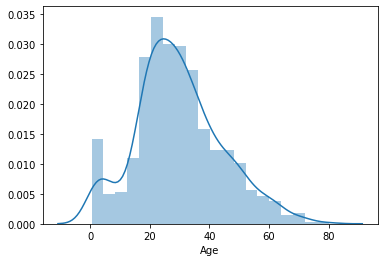

In [35]:
# Age distribution
sns.distplot(df["Age"])

### The Embarked Column

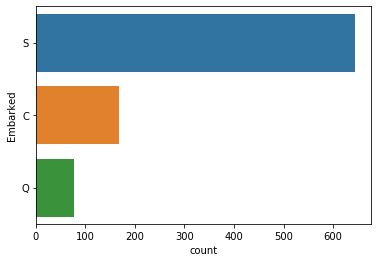

In [38]:
# countplot
sns.countplot(y='Embarked', data=df);

## Data Cleaning

In [39]:
# checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

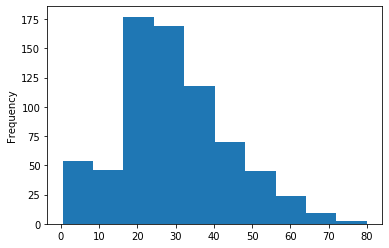

In [40]:
# checking the distribution for age
df["Age"].plot.hist()

In [41]:
# imputing the age by filling the missing values with median
# first create a groubby object bysexclass
bysexclass = df.groupby(['Sex', 'Pclass'])

#function that imputes the median
def impute_median(series):
    return series.fillna(series.median())

#impute age and assign to df
df.Age = bysexclass['Age'].transform(impute_median)

#checking if imputed
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [47]:
#check if age has been cleaned
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [43]:
# drop the cabin column
df.drop('Cabin', axis=1, inplace=True)

In [44]:
# checking if the cabin column has been dropped
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [46]:
# dropping all NaN values
df.dropna(inplace=True)

### Feature Encoding

In [51]:
# getting dummy variables for Pclass, Sex, and Embarked
pclass=pd.get_dummies(df['Pclass'], drop_first=True)
sex=pd.get_dummies(df['Sex'], drop_first=True)
embarked=pd.get_dummies(df['Embarked'], drop_first=True)

print(pclass.head(3))
print(sex.head(3))
print(embarked.head(3))

   2  3
0  0  1
1  0  0
2  0  1
   male
0     1
1     0
2     0
   Q  S
0  0  1
1  0  0
2  0  1


In [52]:
# concatenate to df
df=pd.concat([df, pclass, sex, embarked], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1


In [53]:
# dropping the encoded columns and columns that are not required
df.drop(['PassengerId', 'Pclass', 'Name', 'Sex'], axis=1, inplace=True)
df.head(3)

,Survived,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,0,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1


In [54]:
df.drop('Ticket', axis=1, inplace=True)

In [57]:
df.head(2)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [56]:
df.drop('Embarked', axis=1, inplace=True)

## Building the Model

In [58]:
# libraries for building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [59]:
# selecting the x and y variables
X=df.drop('Survived', axis=1)
y=df['Survived']

In [60]:
X.shape

(889, 9)

In [61]:
y.shape

(889,)

In [62]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
# training the model
regressor=LogisticRegression(solver='lbfgs',max_iter=1000)
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
#making predictions
y_pred = regressor.predict(X_test)

In [66]:
df1 = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df1.head(10)

,Actual,predicted
14,0,1
159,0,0
763,1,1
741,0,0
483,1,0
262,0,0
619,0,0
707,1,0
534,0,1
549,1,0


In [67]:
#classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82       157\n           1       0.77      0.68      0.72       110\n\n    accuracy                           0.78       267\n   macro avg       0.78      0.77      0.77       267\nweighted avg       0.78      0.78      0.78       267\n'

In [68]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[134,  23],
       [ 35,  75]], dtype=int64)

In [69]:
# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7827715355805244
